In [69]:
import time
import torch
from torch import nn
import torchvision.transforms as transforms
import torchvision.datasets as dset
import matplotlib.pyplot as plt
import numpy as np

In [70]:
def status(batch_size, ep, epoch, i, loss, acc, data_loader):
    # status
    clear_output(wait=True)
    print(str(ep) + '/' + str(epoch))
    print('batch: ' + str(i+1) + '/' + str(len(data_loader)) + 
             ' [' + '='*int((i+1)/(len(data_loader)/20)) +
              '>' + ' '*(20 - int((i+1)/(len(data_loader)/20))) +
              ']')
    print('Loss: %.4g '% ((loss / ((i+1)*batch_size))))
    
#-------------------------------------------------------------------
def conv(dimIn, dimOut):
    model = nn.Sequential(
        nn.Conv2d(dimIn, dimOut, kernel_size=3, stride=1,
                  padding=1),
        nn.BatchNorm2d(dimOut),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Conv2d(dimOut, dimOut, kernel_size=3, stride=1,
                 padding=1),
        nn.BatchNorm2d(dimOut)
    )
    return model

#-------------------------------------------------------------------
def pool():
    p = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
    return p

#-------------------------------------------------------------------
def invConv(dimIn, dimOut):
    model = nn.Sequential(
        nn.ConvTranspose2d(dimIn, dimOut, kernel_size=3, stride=2,
                           padding=1, output_padding=1),
        nn.BatchNorm2d(dimOut),
        nn.LeakyReLU(0.2, inplace=True)
    )
    return model
    
#-------------------------------------------------------------------
def last(dimIn, dimOut):
    model = nn.Sequential(
        nn.Conv2d(dimIn, dimOut, kernel_size=3, stride=1,
                  padding=1),
        nn.Tanh()
    )
    return model

In [71]:
img_size = 256
img_dir = "./maps/"
trainset = dset.ImageFolder(root=img_dir,
                            transform = transforms.Compose([
                            transforms.Scale(size=img_size),
                            transforms.CenterCrop(size=(img_size,
                            img_size*2)),
                            transforms.ToTensor(),
                            ]))
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, 
                                          num_workers=2)

/anaconda3/lib/python3.7/site-packages/torchvision/transforms/transforms.py:207: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [72]:
conv1 = conv(3, 6)
pool1 = pool()
conv2 = conv(6, 12)
pool2 = pool()

bridge = conv(12, 24)
        
inv1 = invConv(24, 12)
up1 = conv(24, 12)
inv2 = invConv(12, 6)
up2 = conv(12, 6)
        
last = last(6, 3)

torch.Size([4, 3, 256, 512])
torch.Size([4, 6, 128, 256])
torch.Size([4, 12, 64, 128])
torch.Size([4, 24, 64, 128])
torch.Size([4, 12, 128, 256])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([4, 6, 256, 512])
torch.Size([4, 3, 256, 512])


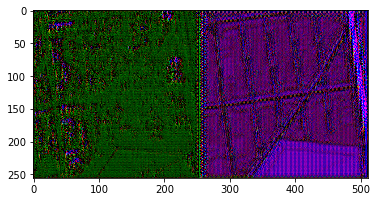

In [81]:
for i, (data, lab) in enumerate(trainloader):
    print(data.shape)
    
    c1 = conv1(data)
    p1 = pool1(c1)
    print(p1.shape)
    c2 = conv2(p1)
    p2 = pool2(c2)
    print(p2.shape)
        
    br = bridge(p2)
    print(br.shape)
        
    i1 = inv1(br)
    j1 = torch.cat([i1, c2],dim=1)
    u1 = up1(j1)
    print(u1.shape)
    i2 = inv2(u1)
    j2 = torch.cat([i2, c1],dim=1)
    u2 = up2(j2)
    print(u2.shape)
        
    res = last(u2)
    print(res.shape)
    
    
    image = res[1,0:3,:,:].detach()
    #print(image.shape)
    plt.imshow(np.transpose(image, (1,2,0)))
    plt.show()
    
    break
    print("\n\n")